# OneHot & Target Encoding 

OneHot & Target Encoder are two catergorical encoders. When making the baseline model we did not consider that changing the phone number column and dropping the area code column would lead to loss of useful information. 

So the focus of this notebook will be to test the encoders listed above to see which one can transform the area code column into a useful catergorical column for our model.

In [1]:
# Library Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Method/Model Imports
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#Metric Imports
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_confusion_matrix


In [2]:
df = pd.read_csv('Cleaned_Churn_Data.csv', index_col=0) # importing data to notebook

In [3]:
df.head() # viewing data

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,p_number,target
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,4153824657,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,4153717191,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,4153581921,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,4083759999,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,4153306626,0


# OneHot Coder  Data Frame
Below you will see the process of encoding the area code colunm using OneHot and then fitting it on to the whole data frame. 

In [4]:
onehot = OneHotEncoder(cols='area code') # setting the onehot encoder applied to the area code column to a variable

In [5]:
df_oh = onehot.fit_transform(df) # fitting the endcoded area code column to the whole data frame

In [6]:
df_oh.head() # viewing the newly transformed data frame

,account length,area code_1,area code_2,area code_3,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,p_number,target
0,128,1,0,0,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,4153824657,0
1,107,1,0,0,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,4153717191,0
2,137,1,0,0,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,4153581921,0
3,84,0,1,0,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,4083759999,0
4,75,1,0,0,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,4153306626,0



**We need to now get rid of the p_number column since we are using the area code 1, 2, & 3 columns instead**

In [7]:
df_oh = df.drop(columns='p_number') # dropping the column we do not need

In [8]:
df_oh.head() # checking my work

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,target
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
# grabbing X and y
X = df_oh.drop(columns='target')
y = df_oh['target']

# Random Forest OneHot Encoder
Now that we have applied our first encoder to the df_oh data frame we can now apply the random forest model and see how it performs. After doing this we will then apply this same encoder to see if we can impove the scores of gradient boost and Adaboot. This way we are able to cunduct a true analysis of the three models used in this project.    

In [12]:
rfc = RandomForestClassifier(class_weight= 'balanced',
 criterion= 'entropy',
 max_depth= 6,
 n_estimators= 100) # assigning model to variable



# creating the test and training data split for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,  random_state= 42) 



rfc.fit(X_train, y_train) # fitting model on to the train data 



# predicting on the test and train data 
test_pred = rfc.predict_proba(X_test)[:, 1]
train_pred = rfc.predict_proba(X_train)[:, 1]

 

train_score = roc_auc_score(y_train, train_pred) # score on the train data 
test_score = roc_auc_score(y_test, test_pred) # score on the tested data

In [13]:
print(f'Train ROC_AUC Score: {train_score}') # calculating the ROC_AUC score for train data 

print(f'Test ROC_AUC Score: {test_score}')  # calculating the ROC_AUC score for test data 

Train ROC_AUC Score: 0.9668000908049547
Test ROC_AUC Score: 0.9342849083215796


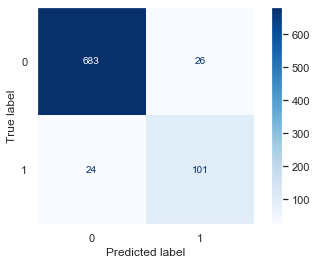

In [14]:
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')
plt.grid(False) # confusion matrix on test data

In [15]:
# calculating Accuracy score for test data  > (TP + TN ) / (TP + TN +  FP + FN)
Accuracy_Score =(103 + 683)/ (103 + 683 + 26 + 22)
print(f'Accuracy Score: {Accuracy_Score}')

Accuracy Score: 0.9424460431654677


## Quick Observation:
As you can see the scores increased with the onehot coder! Remeber the score from before: 

**Testing Metrics Before OneHot Encoder**

Accuracy Score : 0.9364508393285371

ROC_AUC : 0.9097884344146685 

With the OneHot Encoder, the spread between the two scores did decrease. This tells us that the model is very confident in its predictions and how "correct" those predictions are. 


Next we will apply the Target Encoder to our data frame (before the application of onehot to avoid any mix ups) and fit it to our Random Forest model to see how this version does.

# Target Encoder Data Frame

In [21]:
# # transform the datasets
training_dataset = tar_en.fit_transform(X_train, y_train)

In [23]:
# use target encoding to encode area code column
tar_en = TargetEncoder(cols='area code')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= .25,  random_state= 42 ) 


# testing_numeric_dataset = tar_en.transform(X_test)

ValueError: operands could not be broadcast together with shapes (2499,) (49980,) (2499,) 

# Random Forest Target Encoder

In [22]:
# predicting on the test and train data 
test_pred2 = rfc.predict_proba(X_test)[:, 1]


ValueError: Number of features of the model must match the input. Model n_features is 18 and input n_features is 20 

In [17]:
# train_score2 = roc_auc_score(y_train, train_pred2) # score on the train data 
# test_score2 = roc_auc_score(y_test, test_pred2) # score on the tested data

In [18]:
# plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')
# plt.grid(False) # confusion matrix on test data

# Gradient Boost OneHot Encoder

# Gradient Boost Target Encoder

# AdaBoost OneHot Encoder

# AdaBoost Target Encoder

# Conclusion 
Below you can see how each model with encodign applied did. From the list below you can see that the best performing model was ....... when the encoder ...... was applied. For the most part the top two models were ..... and ..... which cange be interchanged depending on the business problem.  

# Random Forest OneHot Encoder

ROC_AUC Score:

Accuracy Score:
    

# Random Forest Target Encoder

ROC_AUC Score:

Accuracy Score:


# Gradient Boost OneHot Encoder

ROC_AUC Score:

Accuracy Score:
    

# Gradient Boost Target Encoder

ROC_AUC Score:

Accuracy Score: 
    

# AdaBoost OneHot Encoder

ROC_AUC Score:

Accuracy Score:
    

# AdaBoost Target Encoder

ROC_AUC Score:

Accuracy Score: